## Import the Libraries



In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Create the Data Frame


*   I created the data frame from the Spotify JSON file I downloaded. I combined all the data in one json file to make the loading process more simple.
*   For the health data I will need, I used the csv file I extracted from Apple Health.



In [ ]:
# Path to the Spotify JSON file
spotify_data_path = "/content/spotify_history_all.json"

# Load Spotify JSON data
with open(spotify_data_path, 'r') as f:
    spotify_data = json.load(f)

# Step 2: Create a DataFrame
spotify_df = pd.DataFrame(spotify_data)

# Step 3: Convert 'ts' (timestamp) to datetime
spotify_df['endTime'] = pd.to_datetime(spotify_df['ts'])

#  Ensure 'ms_played' is numeric
spotify_df['ms_played'] = pd.to_numeric(spotify_df['ms_played'], errors='coerce')

#  Drop the IP address column
if 'ip_addr' in spotify_df.columns:
    spotify_df = spotify_df.drop(columns=['ip_addr'])

#  Display the last 5 rows of the DataFrame
print("Spotify DataFrame:")
print(spotify_df.head())

Spotify DataFrame:
                     ts                                           platform  \
0  2018-10-07T09:39:49Z        Android OS 5.1.1 API 22 (samsung, SM-J200H)   
1  2018-10-07T10:27:32Z        Android OS 5.1.1 API 22 (samsung, SM-J200H)   
2  2018-10-07T11:32:57Z        Android OS 5.1.1 API 22 (samsung, SM-J200H)   
3  2019-06-11T18:03:49Z  Android-tablet OS 8.0.0 API 26 (General Mobile...   
4  2019-06-11T18:03:54Z  Android-tablet OS 8.0.0 API 26 (General Mobile...   

   ms_played conn_country master_metadata_track_name  \
0      18553           TR                      Kibir   
1       3229           TR               Korkma Söyle   
2       1523           TR               Korkma Söyle   
3      18974           TR                     Mayday   
4       4758           TR                   Semt İşi   

  master_metadata_album_artist_name master_metadata_album_album_name  \
0                            Contra                            Kibir   
1                            Sa

In [ ]:


# Path to your Apple Health CSV file
health_data_path = "/content/apple_health_data.csv"

#  Load the CSV file
health_df = pd.read_csv(health_data_path, low_memory=False)

#  Handle mixed data types
# Convert the 'value' column to numeric, forcing errors to NaN
health_df['value'] = pd.to_numeric(health_df['value'], errors='coerce')

#  Filter for step count data
# Filter rows where 'type' is 'HKQuantityTypeIdentifierStepCount'
step_count_df = health_df[health_df['type'] == 'HKQuantityTypeIdentifierStepCount']

#  Drop rows with missing or invalid values
step_count_df = step_count_df.dropna(subset=['value'])

#  Drop the IP address column (if it exists)
if 'ip_addr' in step_count_df.columns:
    step_count_df = step_count_df.drop(columns=['ip_addr'])

#  Display the Step Count DataFrame without IP Address
print("Step Count Data: ")
print(step_count_df.head())

Step Count Data: 
                                type      sourceName   unit  \
2  HKQuantityTypeIdentifierStepCount  Kadir’s iPhone  count   
3  HKQuantityTypeIdentifierStepCount  Kadir’s iPhone  count   
4  HKQuantityTypeIdentifierStepCount  Kadir’s iPhone  count   
5  HKQuantityTypeIdentifierStepCount  Kadir’s iPhone  count   
6  HKQuantityTypeIdentifierStepCount  Kadir’s iPhone  count   

                creationDate                  startDate  \
2  2023-01-21 22:09:08 +0300  2023-01-21 21:59:00 +0300   
3  2023-01-21 22:39:12 +0300  2023-01-21 22:28:09 +0300   
4  2023-01-22 00:23:38 +0300  2023-01-22 00:13:30 +0300   
5  2023-01-22 01:45:41 +0300  2023-01-22 01:11:31 +0300   
6  2023-01-22 02:06:38 +0300  2023-01-22 01:56:20 +0300   

                     endDate  value  
2  2023-01-21 21:59:18 +0300   31.0  
3  2023-01-21 22:28:12 +0300    8.0  
4  2023-01-22 00:13:35 +0300   13.0  
5  2023-01-22 01:16:19 +0300   36.0  
6  2023-01-22 01:58:50 +0300   87.0  


# Monthly Total Listening Time



*   In this graph, I constructed a histogram that shows my monthly total listening time.
*   In high school, I didn't use to listen to music as I do in university. That's why the graph looks skewed.




<ipython-input-58-7903278b62af>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  spotify_df['month'] = spotify_df['endTime'].dt.to_period('M')  # Extract month-year


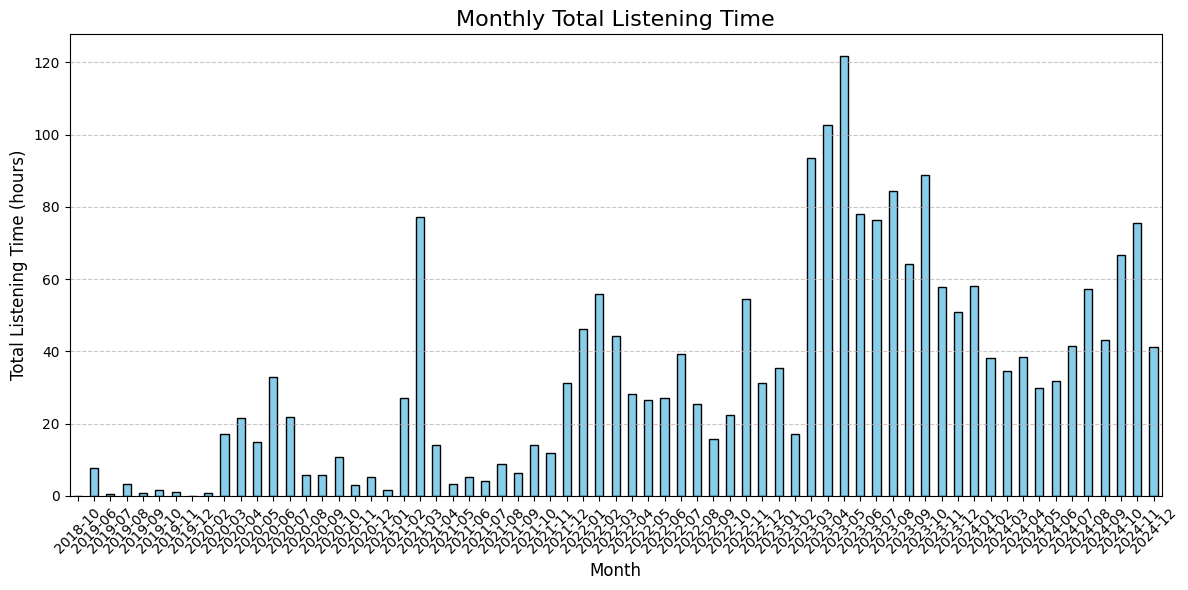

In [ ]:
#  Extract the month from 'endTime'
spotify_df['month'] = spotify_df['endTime'].dt.to_period('M')  # Extract month-year

#  Aggregate total listening time per month
monthly_listening_time = spotify_df.groupby('month')['ms_played'].sum()

#  Convert milliseconds to hours
monthly_listening_time_hours = monthly_listening_time / (1000 * 60 * 60)

#  Plot the monthly listening times
plt.figure(figsize=(12, 6))
monthly_listening_time_hours.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Monthly Total Listening Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Listening Time (hours)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Monthly Walking Steps


*   The data should actually start from January 2023 and end on January 2025 but I excluded them because they give incomplete data and the comparison among these months and others would give wrong conclusions.
*   At first glance, the data looks uniformly distributed except the seasonal fluctuations.



<ipython-input-59-078342d20687>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  step_count_df['month'] = step_count_df['startDate'].dt.to_period('M')  # Extract month-year


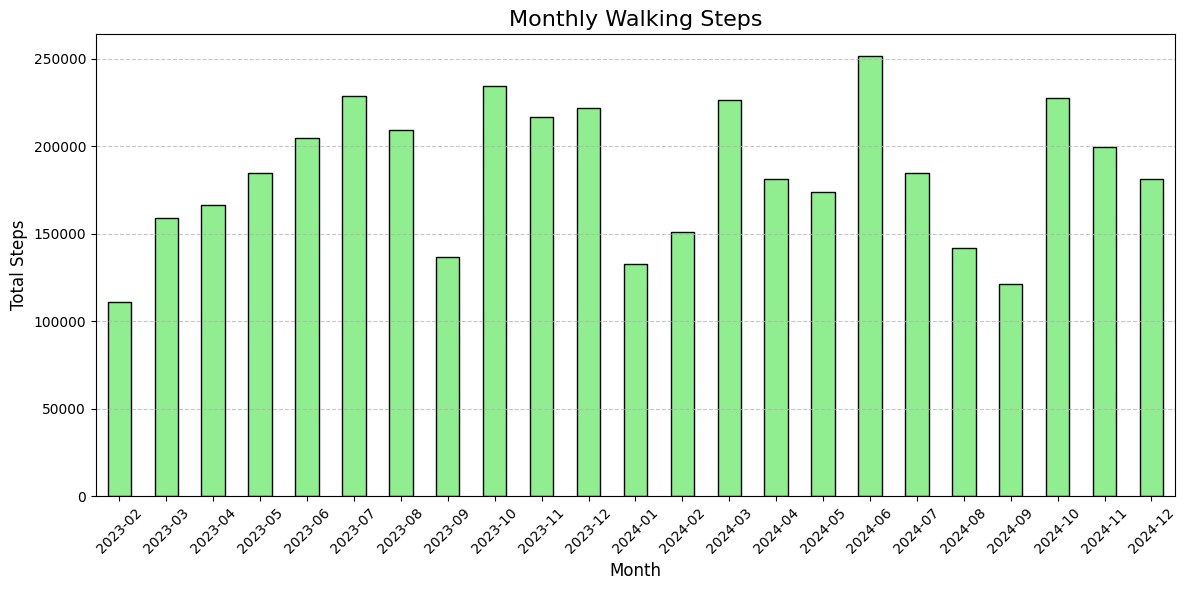

In [ ]:
# Assuming `step_count_df` has already been created
#  Convert startDate to datetime (if not already done)
step_count_df['startDate'] = pd.to_datetime(step_count_df['startDate'])

#  Ensure 'value' column is numeric
step_count_df['value'] = pd.to_numeric(step_count_df['value'], errors='coerce')

# Step 3: Extract the month-year from 'startDate'
step_count_df['month'] = step_count_df['startDate'].dt.to_period('M')  # Extract month-year

# Step 4: Aggregate total steps per month
monthly_steps = step_count_df.groupby('month')['value'].sum()

# Step 5: Exclude incomplete months (e.g., 2023-01 and 2025-01)
monthly_steps_filtered = monthly_steps.drop(['2023-01', '2025-01'], errors='ignore')

# Step 6: Plot the monthly walking steps
plt.figure(figsize=(12, 6))
monthly_steps_filtered.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add titles and labels
plt.title("Monthly Walking Steps", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Steps", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Monthly Listening Time vs. Walking Steps


*   At first, I compared the monthly walking steps and listening time so see whether I can extract a pattern from the scatter plot.
*   There seems no direct relationship between the parameters when we compare total monthly amounts.



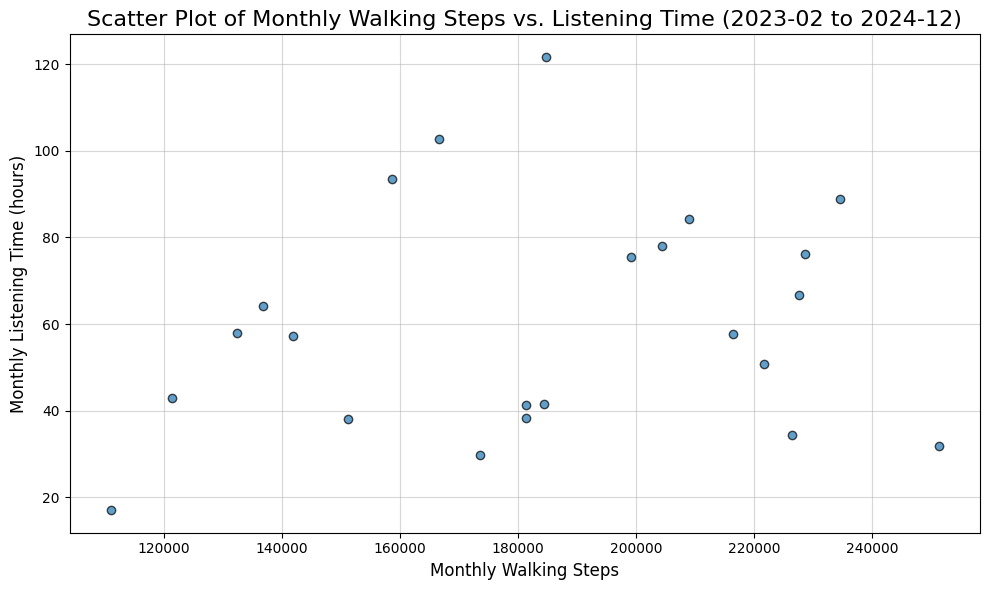

In [ ]:
#  Filter the datasets for the desired date range (2023-02 to 2024-12)
filtered_steps = monthly_steps_filtered[
    (monthly_steps_filtered.index >= '2023-02') &
    (monthly_steps_filtered.index <= '2024-12')
]

filtered_listening_time = filtered_monthly_listening_time[
    (filtered_monthly_listening_time.index >= '2023-02') &
    (filtered_monthly_listening_time.index <= '2024-12')
]

#  Combine the filtered datasets
combined_data = pd.DataFrame({
    "Walking Steps": filtered_steps,
    "Listening Time (hours)": filtered_listening_time
}).dropna()  # Drop rows with missing data

#  Create the Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_data["Walking Steps"], combined_data["Listening Time (hours)"], alpha=0.7, edgecolor='k')

# Add titles and labels
plt.title("Scatter Plot of Monthly Walking Steps vs. Listening Time (2023-02 to 2024-12)", fontsize=16)
plt.xlabel("Monthly Walking Steps", fontsize=12)
plt.ylabel("Monthly Listening Time (hours)", fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Draw the regression line

*   When we draw the regression line and calculate R^2 value, the result is 0.03 and there is barely any relationship, as we except from the graph above.
*  Parallelly, the p-value is 0.41. From this, we should conclude that the null hypothesis shouldn't be rejected. When we think of the null hypothesis as "There is no relationship between listening time and the step count", this conclusion is also acceptable.



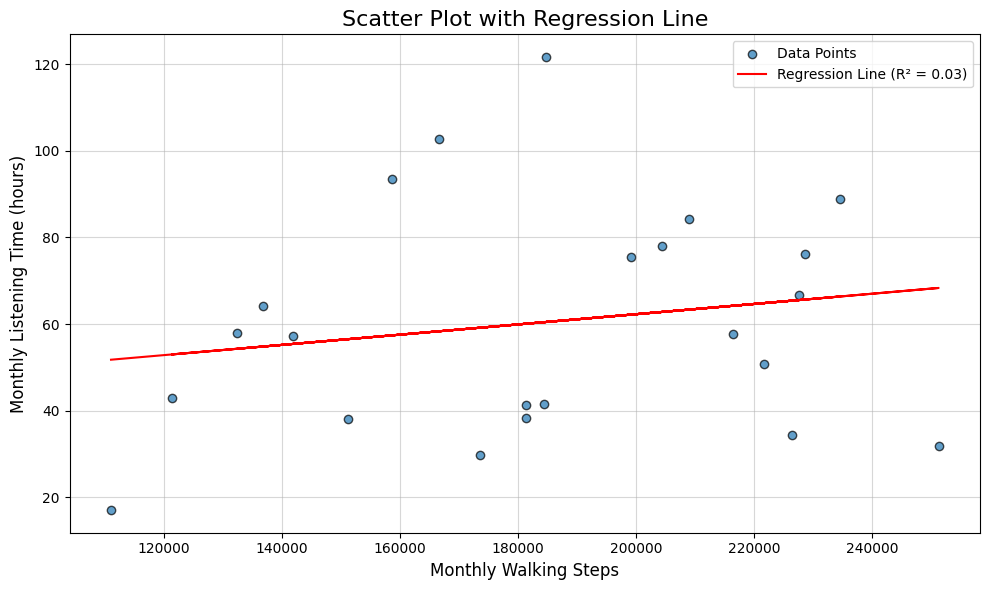

Slope: 0.00011807107236425237
Intercept: 38.679848741340976
R-squared: 0.03154605533562768
P-value: 0.4174962959575922
Standard Error: 0.00014275811871696808


In [ ]:
# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(
    combined_data["Walking Steps"], combined_data["Listening Time (hours)"]
)

# Calculate regression line
x = combined_data["Walking Steps"]
y = slope * x + intercept

# Plot Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(combined_data["Walking Steps"], combined_data["Listening Time (hours)"], alpha=0.7, edgecolor='k', label="Data Points")
plt.plot(x, y, color="red", label=f"Regression Line (R² = {r_value**2:.2f})")

# Add labels, title, and legend
plt.title("Scatter Plot with Regression Line", fontsize=16)
plt.xlabel("Monthly Walking Steps", fontsize=12)
plt.ylabel("Monthly Listening Time (hours)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Print Regression Statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Daily Version of the same scatter plot

*   I plotted the daily version of the Spotify Listening Time vs Step Count and it turns out that there is no relationship also in the daily scale.



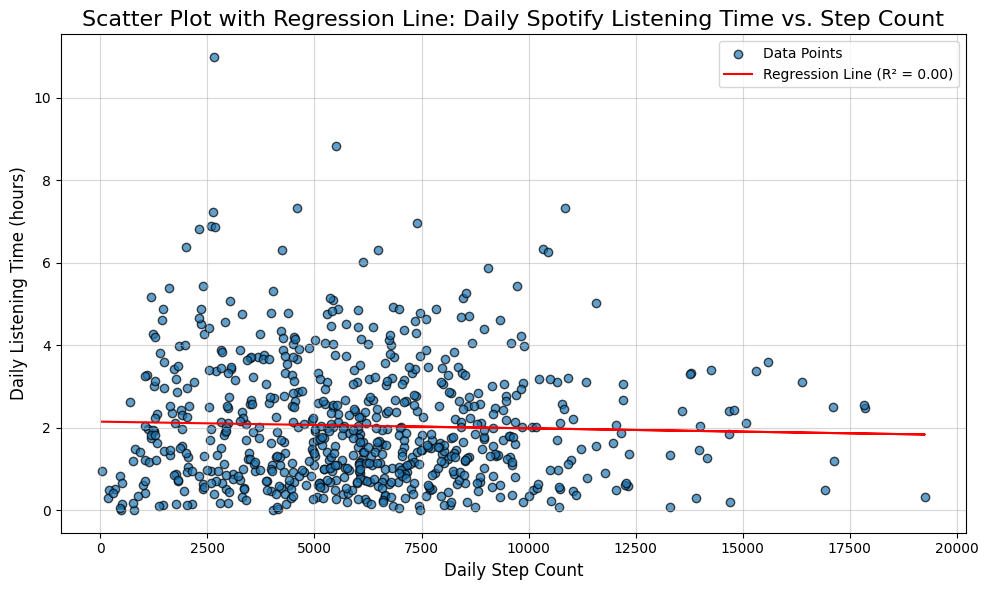

Slope: -1.6139997209485505e-05
Intercept: 2.145453294045723
R-squared: 0.0011951931793537163
P-value: 0.36489054667437737
Standard Error: 1.7801079739672094e-05


In [ ]:
from scipy.stats import linregress

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(
    combined_data["Step Count"], combined_data["Listening Time (hours)"]
)

# Calculate regression line
x = combined_data["Step Count"]
y = slope * x + intercept

# Plot Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(combined_data["Step Count"], combined_data["Listening Time (hours)"], alpha=0.7, edgecolor='k', label="Data Points")
plt.plot(x, y, color="red", label=f"Regression Line (R² = {r_value**2:.2f})")

# Add labels and title
plt.title("Scatter Plot with Regression Line: Daily Spotify Listening Time vs. Step Count", fontsize=16)
plt.xlabel("Daily Step Count", fontsize=12)
plt.ylabel("Daily Listening Time (hours)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print Regression Statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Number of distinct songs listened per month


*   Now, I generate the histogram for the number of different songs listened per month.
*   The distribution doesn't look like much different than the histogram for the listening time per month.





<ipython-input-79-3d2c3496e0cf>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['ts'].dt.to_period('M')


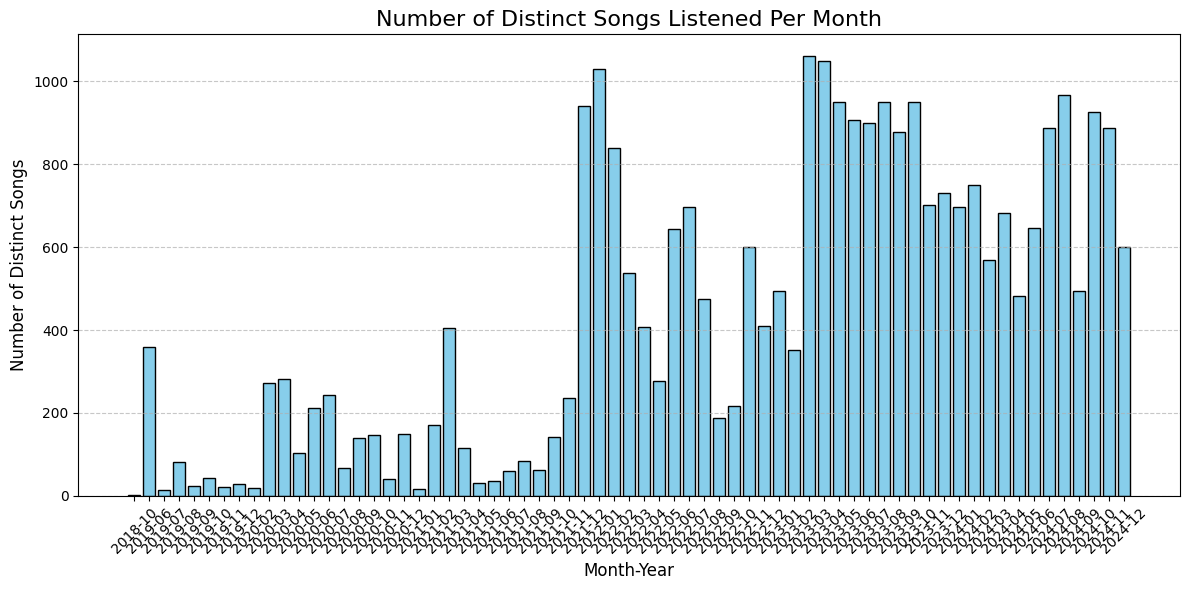

In [79]:
# Convert to DataFrame
df = pd.DataFrame(spotify_data)

# Ensure `ts` is datetime and extract month-year
df['ts'] = pd.to_datetime(df['ts'])
df['month_year'] = df['ts'].dt.to_period('M')
# Drop duplicate songs within each month
distinct_songs = df[['month_year', 'master_metadata_track_name']].drop_duplicates()

# Count the number of distinct songs per month
song_variety = distinct_songs.groupby('month_year')['master_metadata_track_name'].nunique().reset_index()
song_variety.rename(columns={'master_metadata_track_name': 'distinct_songs_count'}, inplace=True)

# Convert month-year to string for plotting
song_variety['month_year'] = song_variety['month_year'].astype(str)

# Plot the data
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(song_variety['month_year'], song_variety['distinct_songs_count'], color='skyblue', edgecolor='black')
plt.title('Number of Distinct Songs Listened Per Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Distinct Songs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Number of distinct songs vs. Step Count
Still there is no acceptable regression relationship, the data seems to be randomly distributed.




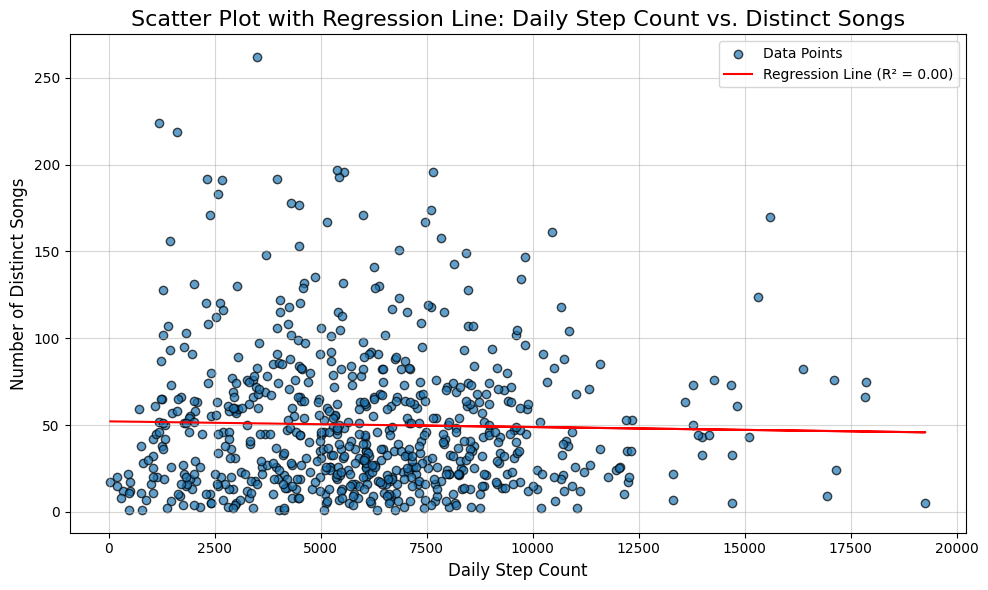

Slope: -0.0003273555395684212
Intercept: 52.09843411556154
R-squared: 0.0006738119137610875
P-value: 0.49635182181871207
Standard Error: 0.0004809784489535937


In [ ]:
# Count the number of distinct songs per day
daily_distinct_songs = spotify_df.groupby('date')['master_metadata_track_name'].nunique()

# Combine distinct songs and step count into a single DataFrame
combined_data = pd.DataFrame({
    "Distinct Songs": daily_distinct_songs,
    "Step Count": daily_steps
}).dropna()  # Drop rows with missing data

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(
    combined_data["Step Count"], combined_data["Distinct Songs"]
)

# Calculate regression line
x = combined_data["Step Count"]
y = slope * x + intercept

# Plot Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(combined_data["Step Count"], combined_data["Distinct Songs"], alpha=0.7, edgecolor='k', label="Data Points")
plt.plot(x, y, color="red", label=f"Regression Line (R² = {r_value**2:.2f})")

# Add labels, title, and legend
plt.title("Scatter Plot with Regression Line: Daily Step Count vs. Distinct Songs", fontsize=16)
plt.xlabel("Daily Step Count", fontsize=12)
plt.ylabel("Number of Distinct Songs", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print Regression Statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Listening Time for different parts of the day
This time, I will look at the amount of time I spent listening music in four different parts of the day.  





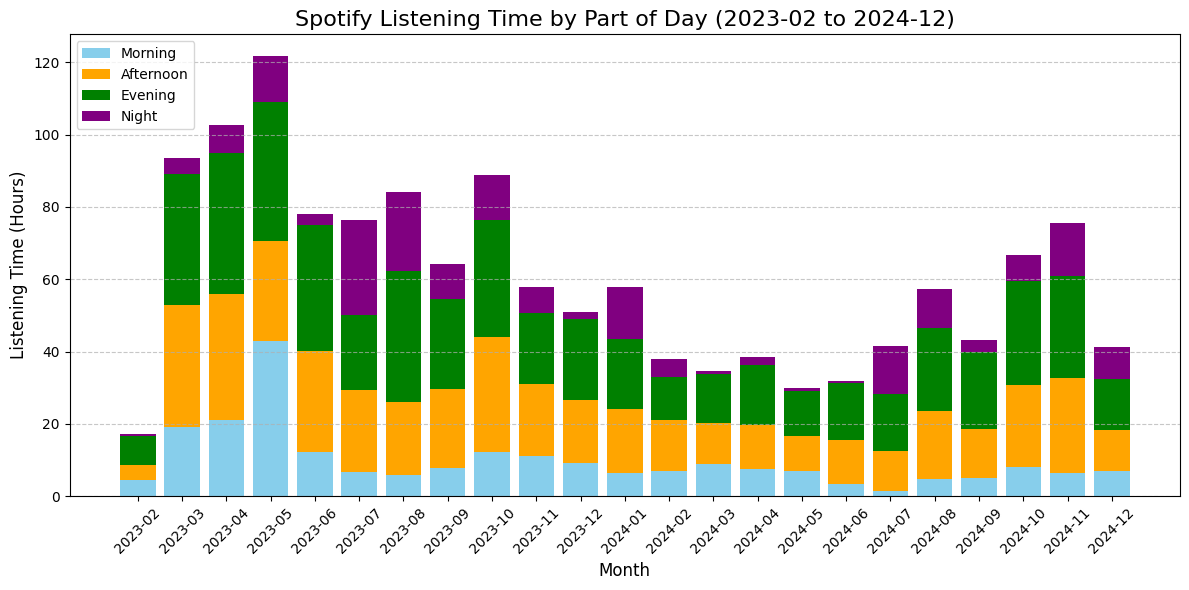

In [ ]:
# Prepare the data for plotting
months = filtered_listening_time_by_month.index.astype(str)  # Convert months to strings
morning = filtered_listening_time_by_month['Morning'] / (1000 * 60 * 60)  # Convert to hours
afternoon = filtered_listening_time_by_month['Afternoon'] / (1000 * 60 * 60)  # Convert to hours
evening = filtered_listening_time_by_month['Evening'] / (1000 * 60 * 60)  # Convert to hours
night = filtered_listening_time_by_month['Night'] / (1000 * 60 * 60)  # Convert to hours

# Create a stacked bar chart
x = range(len(months))  # X-axis positions for months

plt.figure(figsize=(12, 6))
plt.bar(x, morning, label='Morning', color='skyblue')
plt.bar(x, afternoon, bottom=morning, label='Afternoon', color='orange')
plt.bar(x, evening, bottom=morning + afternoon, label='Evening', color='green')
plt.bar(x, night, bottom=morning + afternoon + evening, label='Night', color='purple')

# Add labels, title, and legend
plt.title("Spotify Listening Time by Part of Day (2023-02 to 2024-12)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Listening Time (Hours)", fontsize=12)
plt.xticks(ticks=x, labels=months, rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the stacked bar chart
plt.show()

## Another Representation

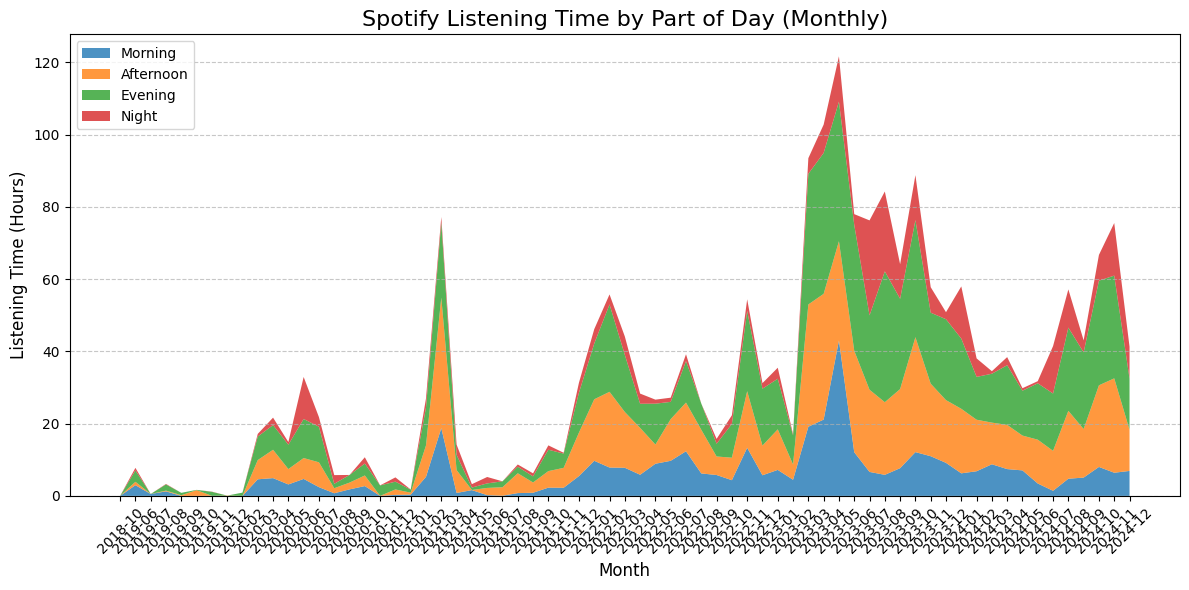

In [ ]:

# Prepare data for stack plot
months = listening_time_by_month.index
morning = listening_time_by_month['Morning'] / (1000 * 60 * 60)  # Convert to hours
afternoon = listening_time_by_month['Afternoon'] / (1000 * 60 * 60)  # Convert to hours
evening = listening_time_by_month['Evening'] / (1000 * 60 * 60)  # Convert to hours
night = listening_time_by_month['Night'] / (1000 * 60 * 60)  # Convert to hours

# Plot the stack plot
plt.figure(figsize=(12, 6))
plt.stackplot(
    months.astype(str),  # Convert months to string for better readability on x-axis
    morning, afternoon, evening, night,
    labels=["Morning", "Afternoon", "Evening", "Night"],
    alpha=0.8
)

# Add labels, title, and legend
plt.title("Spotify Listening Time by Part of Day (Monthly)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Listening Time (Hours)", fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Average Listening Time Per Song Per Month
This histogram shows how much I listened the same songs repeatedly per month.



<ipython-input-75-a72790702e99>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  spotify_df['month'] = spotify_df['endTime'].dt.to_period('M')


Average Listening Time Per Song Per Month (minutes):
month
2018-10    0.194208
2019-06    1.265320
2019-07    2.136681
2019-08    2.392738
2019-09    2.113655
             ...   
2024-08    3.446664
2024-09    5.156109
2024-10    4.164742
2024-11    4.979675
2024-12    4.074418
Freq: M, Length: 67, dtype: float64


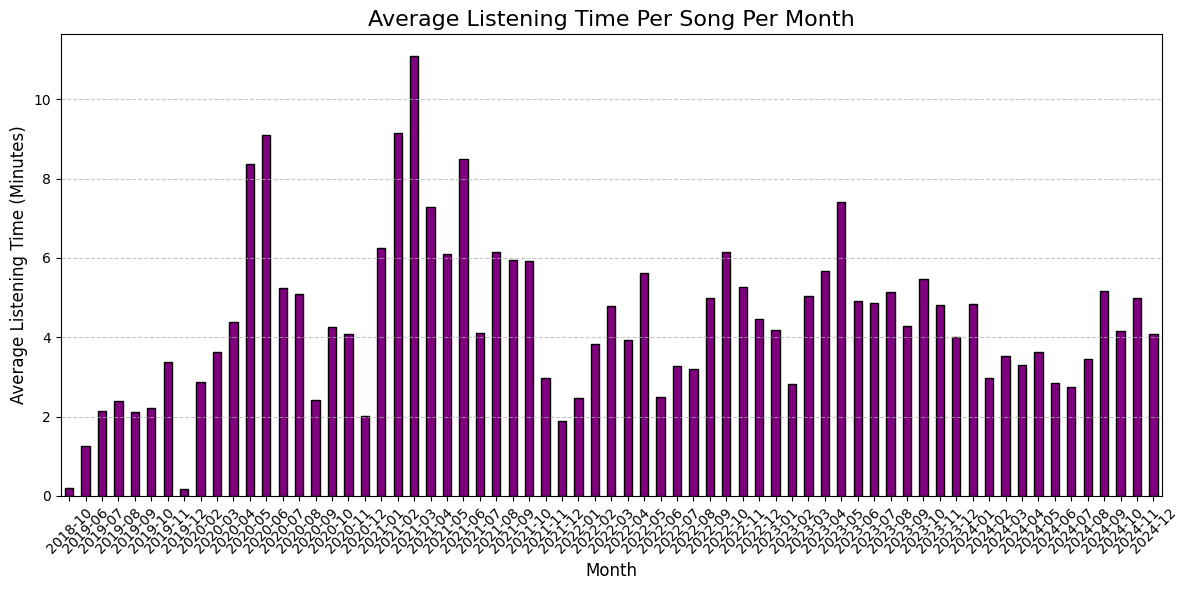

In [ ]:


#  Ensure 'endTime' is in datetime format
spotify_df['endTime'] = pd.to_datetime(spotify_df['endTime'], errors='coerce')

#  Extract the month-year from 'endTime'
spotify_df['month'] = spotify_df['endTime'].dt.to_period('M')

#  Aggregate total listening time per month
monthly_listening_time = spotify_df.groupby('month')['ms_played'].sum()

#  Count the number of unique songs per month
monthly_unique_songs = spotify_df.groupby('month')['spotify_track_uri'].nunique()

#  Calculate average listening time per song
average_listening_time_per_song = monthly_listening_time / monthly_unique_songs

#  Convert milliseconds to minutes for better readability
average_listening_time_per_song_minutes = average_listening_time_per_song / (1000 * 60)

#  Display the result
print("Average Listening Time Per Song Per Month (minutes):")
print(average_listening_time_per_song_minutes)

#  Plot the results
plt.figure(figsize=(12, 6))
average_listening_time_per_song_minutes.plot(kind='bar', color='purple', edgecolor='black')

# Add labels, title, and formatting
plt.title("Average Listening Time Per Song Per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Listening Time (Minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Scatter Plot for Average Listening Time

Clearly, the R^2 value is not enough to conclude that there is a relationship.




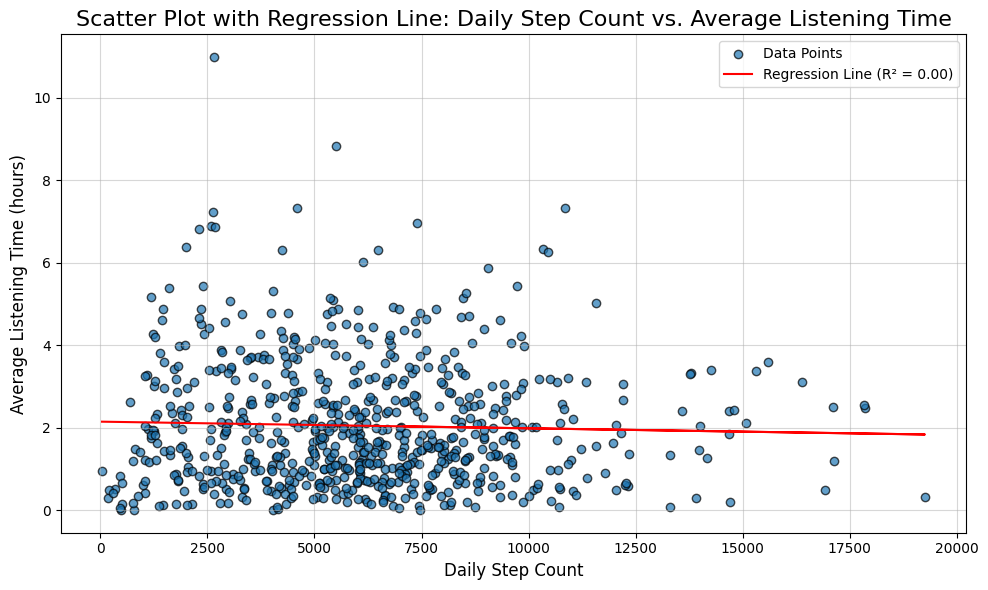

Slope: -1.6139997209485505e-05
Intercept: 2.145453294045723
R-squared: 0.0011951931793537163
P-value: 0.36489054667437737
Standard Error: 1.7801079739672094e-05


In [78]:
# Combine average listening time and step count into a single DataFrame
combined_data = pd.DataFrame({
    "Average Listening Time (hours)": daily_listening_time_hours,
    "Step Count": daily_steps
}).dropna()  # Drop rows with missing data

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(
    combined_data["Step Count"], combined_data["Average Listening Time (hours)"]
)

# Calculate regression line
x = combined_data["Step Count"]
y = slope * x + intercept

# Plot Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(combined_data["Step Count"], combined_data["Average Listening Time (hours)"], alpha=0.7, edgecolor='k', label="Data Points")
plt.plot(x, y, color="red", label=f"Regression Line (R² = {r_value**2:.2f})")

# Add labels, title, and legend
plt.title("Scatter Plot with Regression Line: Daily Step Count vs. Average Listening Time", fontsize=16)
plt.xlabel("Daily Step Count", fontsize=12)
plt.ylabel("Average Listening Time (hours)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print Regression Statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")